<h2 align="center">MNIST Data</h2> 
![](mnist_data.png)

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

Using Theano backend.
Using gpu device 0: GRID K520 (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 5005)


In [15]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

img_rows, img_cols = 28, 28
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255

In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

('x_train shape:', (60000, 1, 28, 28))
('y_train shape:', (60000,))
('x_test shape:', (10000, 1, 28, 28))
('y_test shape:', (10000,))


In [5]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(60000, 'train samples')
(10000, 'test samples')


In [6]:
# 1 into K representation
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

('label : ', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]))


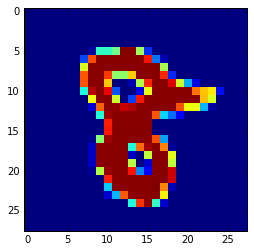

In [7]:
# Example
i = 2400
plt.imshow(x_train[i,0], interpolation='nearest')
print("label : ", y_train[i,:])

<h3 align="center">CNN Architecture INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC -> Softmax</h3> 

In [16]:
# CNN Architecture INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC -> Softmax
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv, border_mode='valid', input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size = batch_size, nb_epoch=nb_epoch, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s - loss: 1.5395 - acc: 0.5598 - val_loss: 0.5043 - val_acc: 0.8632
Epoch 2/20
48000/48000 [==============================] - 3s - loss: 0.4135 - acc: 0.8770 - val_loss: 0.2964 - val_acc: 0.9140
Epoch 3/20
48000/48000 [==============================] - 3s - loss: 0.2944 - acc: 0.9104 - val_loss: 0.2378 - val_acc: 0.9309
Epoch 4/20
48000/48000 [==============================] - 3s - loss: 0.2369 - acc: 0.9284 - val_loss: 0.1930 - val_acc: 0.9459
Epoch 5/20
48000/48000 [==============================] - 3s - loss: 0.1988 - acc: 0.9396 - val_loss: 0.1770 - val_acc: 0.9483
Epoch 6/20
48000/48000 [==============================] - 3s - loss: 0.1694 - acc: 0.9479 - val_loss: 0.1543 - val_acc: 0.9537
Epoch 7/20
48000/48000 [==============================] - 3s - loss: 0.1483 - acc: 0.9553 - val_loss: 0.1337 - val_acc: 0.9613
Epoch 8/20
48000/48000 [==============================] - 3s 

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Error: ', score[0],'Test Accuracy: ', score[1]*100)

('Test Error: ', 0.069256372224353255, 'Test Accuracy: ', 97.680000000000007)


In [20]:
y_pred = model.predict_classes(x_test, verbose=0)
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

[[ 972    0    1    0    0    1    2    1    3    0]
 [   0 1124    3    0    0    1    2    1    4    0]
 [   1    2 1016    2    0    0    0    4    6    1]
 [   0    0    1  996    1    5    0    1    3    3]
 [   1    0    1    0  944    0    3    2    3   28]
 [   2    0    1    5    0  875    5    1    1    2]
 [   7    2    1    1    3    9  935    0    0    0]
 [   1    4   12    4    0    0    0  986    1   20]
 [   4    0    3   11    2    2    3    1  937   11]
 [   3    8    0    5    2    6    0    2    0  983]]


In [ ]:
def plot_filters(layer, x, y):
    filters = layer.W.get_value()
    fig = plt.figure()
    for j in range(len(filters)):
        ax = fig.add_subplot(y,x, j+1)
        ax.matshow(filters[j][0], cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout()
    return plt

In [ ]:
plot_filters(model.layers[0],8,4) ##First Convolutional Layer

In [ ]:
plot_filters(model.layers[3],8,4) ##Second Convolutional Layer